<a href="https://colab.research.google.com/github/Nikitaion/TensorFlowLearning/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for a regression problem, but in our case we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number!

In [19]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## Creating some data to view and fit

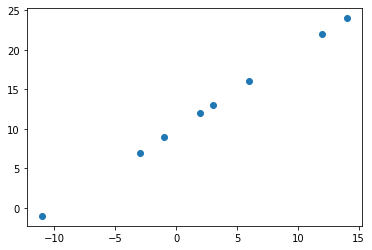

In [20]:
# Create feautures
# X = np.array([-11.0, -3.0, -1.0, 2.0, 3.0, 6.0, 12.0, 14.0, 18.0, 5.0, 123.0, 909.0, 523.0, 241.0, 233.0, 45.0, 64.0, 75.0, 453.0, 345.0, 654.0, 876.0])
X = np.array([-11.0, -3.0, -1.0, 2.0, 3.0, 6.0, 12.0, 14.0])

# Create labels
# y = np.array([-1.0, 7.0, 9.0, 12.0, 13.0, 16.0, 22.0, 24.0, 28.0, 15.0, 133.0, 919.0, 533.0, 251.0, 243.0, 55.0, 74.0, 85.0, 463.0, 355.0, 664.0, 886.0])
y = np.array([-1.0, 7.0, 9.0, 12.0, 13.0, 16.0, 22.0, 24.0])

# Visualize it
plt.scatter(X, y);

## Input and output shapes

In [21]:
# Create and demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [22]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [23]:
X[0].ndim

0

In [24]:
# Turn our NumPy arrays into tensors with dtype float32
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-11.,  -3.,  -1.,   2.,   3.,   6.,  12.,  14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([-1.,  7.,  9., 12., 13., 16., 22., 24.], dtype=float32)>)

In [25]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

## Steps in modeling with TensorFlow

1. **Creating a model** - define the input/output layers, as well as the hidden layers of a deep learning model
2. **Compile a model** - define the loss function (the function which tells our model how wrong it is) and the optimiser (tells our model how improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model)
3. **Fitting a model** - letting the model try to find patterns betveen X and y (features and labels)

In [26]:
# Set random seed
tf.random.set_seed(seed=42)
# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1) # 1 - because we want input 1 number and predict 1 number
])

# 2. Compile the model  
model.compile(loss = tf.keras.losses.mae, # mae is short mean absolute error
              optimizer = tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent (is an optimizer tells our neural network how it should improve)
              metrics=["mae"])
# loss - how wrong your model's predictions are compared to the truth labels (you want to minimise this)
# optimize - how your model should update its internal patterns to better predictions
# metrics - human interpretable values for how well your model is doing

# 3. Fit the model
model.fit(X, y, epochs = 5) # model will have epochs = 5 opportunities of going through X and y
# epochs - how many times the model will go through all of the training examples

Epoch 1/5
1/1 [==============================] - 0s 266ms/step - loss: 11.1823 - mae: 11.1823
Epoch 2/5
1/1 [==============================] - 0s 7ms/step - loss: 11.0967 - mae: 11.0967
Epoch 3/5
1/1 [==============================] - 0s 4ms/step - loss: 11.0111 - mae: 11.0111
Epoch 4/5
1/1 [==============================] - 0s 12ms/step - loss: 10.9255 - mae: 10.9255
Epoch 5/5
1/1 [==============================] - 0s 13ms/step - loss: 10.8398 - mae: 10.8398


In [27]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-11.,  -3.,  -1.,   2.,   3.,   6.,  12.,  14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([-1.,  7.,  9., 12., 13., 16., 22., 24.], dtype=float32)>)

In [28]:
# Try and make a prediction using model
y_pred = model.predict([32.0])
y_pred

# Bad results

array([[22.691912]], dtype=float32)

## Improving our model

We can improve our model, by altering the steps we took to create a model

1. **Creating a model** - here we might add more layers, increase the number of hidden units (also called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function for perhaps the **learning rate** of the optimizatiion function
3. **Fitting a model**  - here we might fit a model for more **epochs** (leave it traning for longer) or on more data (give the model more examples to learn from)

In [29]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
# 2. Compile the model 
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model (this time we will train for longer)
model.fit(X, y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 0s 248ms/step - loss: 10.9601 - mae: 10.9601
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 10.8745 - mae: 10.8745
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 10.7888 - mae: 10.7888
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 10.7032 - mae: 10.7032
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 10.6176 - mae: 10.6176
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 10.5320 - mae: 10.5320
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 10.4463 - mae: 10.4463
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 10.3607 - mae: 10.3607
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 10.2751 - mae: 10.2751
Epoch 10/100
1/1 [==============================] - 0s 14ms/step - loss: 10.1895 - mae: 10.1895
Epoch 11/100
1/1 [==============================] - 0s 6

In [30]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-11.,  -3.,  -1.,   2.,   3.,   6.,  12.,  14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([-1.,  7.,  9., 12., 13., 16., 22., 24.], dtype=float32)>)

In [31]:
# Let's see if our model's prediction has improved
model.predict([12.0]), model.predict([10.0]), model.predict([-32.0]), model.predict([132.0])

(array([[20.68547]], dtype=float32),
 array([[17.383726]], dtype=float32),
 array([[-51.952923]], dtype=float32),
 array([[218.79018]], dtype=float32))

In [32]:
# Let's try to do better

# 1. Create the model (this time with extra layers)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1)
])
# 2. Compile the model (this time with another optimizer with changed learning_rate)
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(lr=0.1),
              metrics=["mae"])
# Note: the learning rate is a most important hyper parameter of many different known networks.

# 3. Fit the model 
model.fit(X, y, epochs = 100)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
1/1 [==============================] - 0s 326ms/step - loss: 11.5667 - mae: 11.5667
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 8.5267 - mae: 8.5267
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 5.7317 - mae: 5.7317
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 6.5478 - mae: 6.5478
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 5.7208 - mae: 5.7208
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 4.5518 - mae: 4.5518
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 4.0236 - mae: 4.0236
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: 3.6773 - mae: 3.6773
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 3.5447 - mae: 3.5447
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 2.9753 - mae: 2.9753
Epoch 11/100
1/1 [==============================] - 0s 17ms/step - loss: 2.

In [33]:
model.predict([12.0]), model.predict([10.0]), model.predict([-11.0]), model.predict([45.0])
#Thats better

(array([[20.848778]], dtype=float32),
 array([[19.065048]], dtype=float32),
 array([[-0.74188113]], dtype=float32),
 array([[50.852535]], dtype=float32))

## Evaluating a model (tommorow)